# Protein Activation after Threshold Reached

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#work on the differential equation portion first.
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
#DE methods
#http://tutorial.math.lamar.edu/Classes/DE/IntroFirstOrder.aspx

#Feed forward motif. X-> Y, X->Z, Y->Z. all arrows signify promoter activity.


In [3]:
min_input = {'x':[None],
			'y':[('x',2)],
			'z':[('x',2),('y',1)]
			}	
beta = {'x':5,
		'y':7,
		'z':3
		}
alpha = {'x':2,	#alpha and beta parameters. (decay and production respectively)
		'y':4,
		'z':5
		}				
y0 = {'x':0,	#initial dosage
	'y':0,
	'z':0
	}	
time_interval = {'x': (0, 3, 100),	#start, stop, steps
			'y':[0],
			'z':[0]
			}	
graph = ['x','y','z']

In [4]:
class p_time():	#calculate protein levels at various times.

	"""
	time model of protein levels
	beta is production rate of protein
	alpha is degradation rate
	y is protein amount
	"""

	def __init__(self , protein):	
		self.p = protein
			
	def p_level(self):	#protein level solver
		y00 = np.array(y0[self.p])	#initial concentration		
		a,b,c = time_interval[self.p]
		x_out = odeint(self.ode, y00, np.linspace(a,b,c), args=(beta[self.p],alpha[self.p]))	#ODE solution
		return x_out
	
	def ode(self, y, t, b, a):	#ODE equation
		dydt = np.array(beta[self.p] - alpha[self.p] * y)
		return dydt
		
	def p_t_level(self, lvl):	#returns the Time at which protein reaches specified lvl.
		#used first order linear ODE. integrating factor method. floats to keep decimals
		time = np.log(float(float(-1 * float(lvl) * alpha[self.p] / beta[self.p]) + 1)) / (-1 * alpha[self.p])
		return time

In [5]:
def threshold(protein):	#check at what times predecessors hit minimum activation lvl
	
	for i in min_input[protein]:
		if i == None:	#empty set
			pass	
		else:	#has some minimum required protein level predecessor 
			predecessor_time(protein, i)
	
	if type(time_interval[protein]) is tuple:
		pass
	else:
		start = time_interval[protein]								#create interval of time starting
		time_interval[protein] = (start, start + 3, 100)	#when last requirement met.

In [6]:
def predecessor_time(p, m):	#find when protein p starts producing based on predecessor levels
	p_needed, lvl_needed = m
	(u,v,w) = time_interval[p_needed]	#u is start time of predecessor. 
	k = p_time(p_needed)				#instance of predecessor needed
	time = k.p_t_level(lvl_needed)		#time calculates how long takes for protein to reach level
	if time_interval[p] < u + time:		#if start time of other factor is limiting(later), replace start time		
		time_interval[p] = u + time		#u needs to be added because start time of an intermediate(ex:y) not 0

In [7]:
def plot(x, y, z):

	k = p_time(x)	#instance
	l = k.p_level()	#ODE solver
	
	m = p_time(y)
	n = m.p_level()
	
	o = p_time(z)
	q = o.p_level()
	
	a,b,c = time_interval[x]	#calculated (start ,stop , #measurements)
	d,e,f = time_interval[y]
	g,h,i = time_interval[z]
	
	plt.plot(np.linspace(a,b,c), l[:,0], 'y', label = 'x')
	plt.plot(np.linspace(d,e,f), n[:,0], 'b', label = 'y')	
	plt.plot(np.linspace(g,h,i), q[:,0], 'g', label = 'z')	
	plt.legend(loc='best')
	plt.xlabel('t')
	plt.grid()
	plt.show()

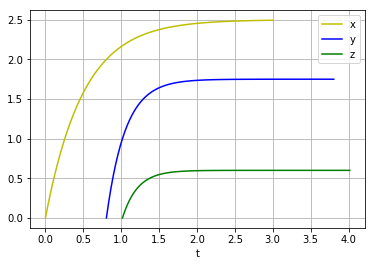

In [8]:
threshold('x')
threshold('y')
threshold('z')
plot('x','y','z')

In [9]:
#the start function needs to pair p_time class with s_activate class. only when s_activate
# gives the go ahead, can we start using p_time.


#modelling a feed forward loop. x->y. x->z. y->z. x and y needed.
#def ff3(x,y,z):	#feed forward 3 node model
	
	
	#time = np.linspace(0, 10, 101)
	#nodes = [x,y,z]	#instances of p_time
	
	
	#x = 0	#initialize x to concentration 0.


#x= p_time(True)
#y= p_time(False)
#z= p_time(False)


SyntaxError: invalid syntax (<ipython-input-9-0ffc9bd2bc91>, line 1)